# Introduction to discritized image representation and maps

## Why a satellite image?

One question that you may have is "why are we looking at a satellite image of the earth?"  Would it be more appropriate to look at an image of a brain?

We are beginning with a picture of the world because most people have encountered maps like this before and that they have many intuitions about what is depected and how it is depicted.  We are going to use those intuitions to help us explore various concepts and abilities we can use in exploring data.  

In the following sections we'll consider how the actual data in the JPEG structure corresponds to things like oceans or forests and how we can use our intuitions to bridge the gap between the raw data and our understanding of the world itself (i.e. the subject of the satellite photography).

Ultimately, what we will be illustrating is the process of **spatial translation** and **masks**.  These concepts are introduce here in 2D using the sattilite image, but as later lessons will show, these concepts are central to our use of neuroimaging data.  For example, when whe initially use an MRI scanner to obtain an image of a persons head, we also get data about the persons neck, head, skull and other tissues that *are not* the brain.  However, when we do our analyses, we only want to look at data that relates to the brain.  To do this, we have to **mask** out those parts of the brain we are not interseted in, and only extract data from the relevant entires.  This lesson provides an introduction to this process.

Lets begin by loading and plotting the image now.

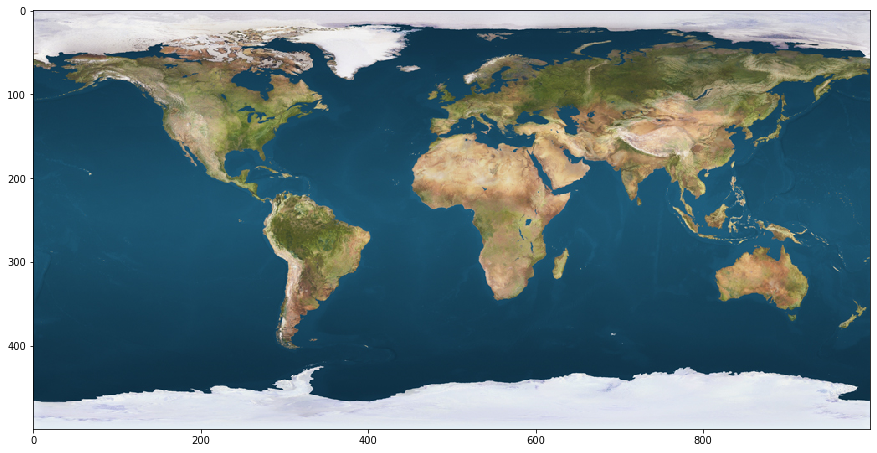

In [2]:
#set some names, because why not

#Path to the repo for this project
repoPath='/Users/plab/Documents/ipynb/'

#file name of standard map of the world
firstMapName='Earthmap1000x500.jpg'

#file name of grayscale map of the world
grayscaleMapName='World_map_blank_without_borders.svg.png'

#file name of world map with "graticule" (lines)
#see https://en.wikipedia.org/wiki/Geographic_coordinate_system for more info
linedMapName='Equirectangular_projection_SW.jpg'

#file name of political world map
politicalMapName='2000px-Dünya.svg.png'


#loading image processing and manipulation package Pillow
# https://pillow.readthedocs.io/en/stable/
import PIL
from PIL import Image
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np

firstMapPath=os.path.join(repoPath,'images',firstMapName) 
firstMap= Image.open(firstMapPath)

#in order to display in jupyter, some trickery is necessary
%matplotlib inline
imshow(np.asarray(firstMap))
fig = plt.gcf()
fig.set_size_inches(15, 30)


Here we see a satellite image just like any other that you've seen before.  Note though, that it is bordered by numbered axes. This is becase we have loaded it here in a jupyter notebook, which treats it just like any other plot that could be generated from code.  These numbers are tracking the pixel rows in columns in the image.  Thus, from this plotting we can see that our code has loaded the image as a 500 by 1000 pixel object.

Take note of the row and column numberings are associated with the plotted image.  We can see that the top row is labled zero, while the final row is unlabled, but corresponds to 500.  Likewise, the first column is labeled zero, but the final (unlabeled) column is corresponds to 1000.  Though this method of orientation may feel unintuitive, this is how data is plotted with matplotlib (the code library we are using to view these images).

Lets use some python functions to extract the data being used to generate this plot and examine it.  We'll look at the dimensions of the image according to the python function, and we'll look at the dimensions of the data itself

In [3]:
from __future__ import print_function
print(firstMap.format,firstMap.size , firstMap.mode)
print('')

firstMapArray=np.asarray(firstMap)
print('Dimensions of array')
firstMapShape=firstMapArray.shape
print(firstMapShape)
print('')

JPEG (1000, 500) RGB

Dimensions of array
(500, 1000, 3)



## JPEGs, color, and data dimensions

The first output:

"JPEG (1000, 500) RGB"

provides us with several details.  It comes from the python functions associated with loading and viewing images.

 - JPEG:  Indicates the file type, which could have also been PNG for example.
 - (1000, 500): This quantity indicates the resolution of of the image.  The first number indicates how many pixels wide it is, while the second indicates how tall it is in pixels.
 - RGB:  Indicates the color component channels that are being combined to create the image.  Here we see that there are three of these channels and they correspond to the Red (R), Green (G), and Blue (B).

The second ouput "(500, 1000, 3)" indicates the dimensions of the image's *actual* data reprsentation.

Here we see that it is a 3 dimensional array.  This may come as a surprise given that the image is clearly 2 dimensional.  The first two values (500 and 1000) correspond to the height and width of the image, but are flipped from the output of the previous report.  This is something to be mindful of when investigating data structures, as the norms for ordering dimensions vary from function to function and programming language to programming language.  The final value (3) is something new though.  This corresponds to the aforementioned color channels for the image.  This value is 3 because this is an RGB based image.  Had the final entry of the first output been CMYK (Cyan Magenta Yellow Black) the size of the final dimension would have been 4 instead of 3.  Typically though, CMYK is used for printed (or to be printed) mediums.


#### Lets plot each of these color layers separately and take a look at the output.

We'll plot the red, green, and blue channels separately below, as though they were full maps in and of themselves.

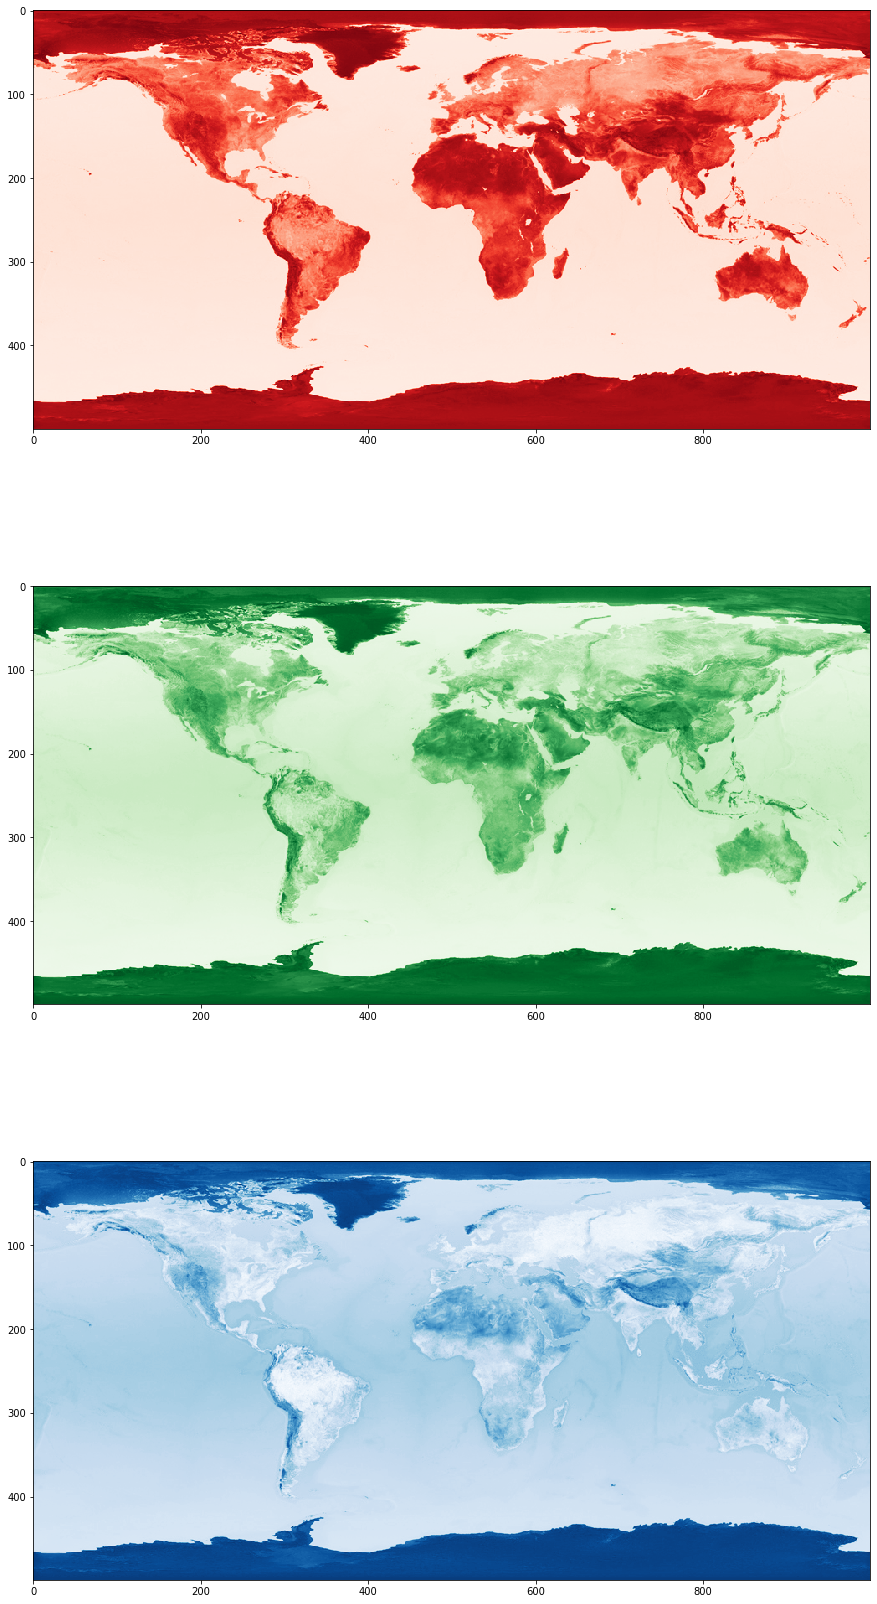

In [4]:
plt.subplot(3, 1, 1)
imshow(firstMapArray[:,:,0],cmap='Reds')
fig = plt.gcf()
fig.set_size_inches(15, 30)

plt.subplot(3, 1, 2)
imshow(firstMapArray[:,:,1],cmap='Greens')
fig = plt.gcf()
fig.set_size_inches(15, 30)

plt.subplot(3, 1, 3)
imshow(firstMapArray[:,:,2],cmap='Blues')
fig = plt.gcf()
fig.set_size_inches(15, 30)

##  Why three layers?

Each of these color layers looks somewhat similar but contain slightly different information.  For example, if you look closely at the red image, you'll notice that it does not exhibit the same equatorial "darkening" that the green and blue images do.  Other differences are visbile between green and blue images, though they are more subtle.  For example Lake Victoria (in the eastern part of central Africa, at about 600 X and 250 Y) is visible in the green channel but not in the blue channel.  Thus, although these three channels constitute distinct bodies of information, this information is combined by our computer monitors and we perceive this as the coherent map depicted previously.


#### What happens when you look at a specific pixel across the color layers?

Lets look at the data stored across these three layers, in several specific pixels from the map:
 - the upper left of the map [0,0]
 - the atlantic ocean [450,400]
 - the United States [150,200]
 - Russia [80,700]
 - North Africa [180,550]
 
Below we'll index into the data structure for a pixel meeting the description above, and then print out the numerical information that is associated with that pixel.

In [5]:
print('Upper left pixel RGB Value')
upLeftPixel=firstMapArray[0,0]
print(upLeftPixel)
print('')

print('Atlantic pixel RGB Value')
atlanticPixel=firstMapArray[450,400]
print(atlanticPixel)
print('')

print('US pixel RGB Value')
usPixel=firstMapArray[150,200]
print(usPixel)
print('')

print('Russia pixel RGB Value')
russiaPixel=firstMapArray[80,700]
print(russiaPixel)
print('')

print('North Africa pixel RGB Value')
northAfricaPixel=firstMapArray[180,550]
print(northAfricaPixel)
print('')

Upper left pixel RGB Value
[214 213 227]

Atlantic pixel RGB Value
[14 49 69]

US pixel RGB Value
[207 186 155]

Russia pixel RGB Value
[65 74 45]

North Africa pixel RGB Value
[204 170 125]



## What's in a pixel?

Above we have querried the entries for the above pixels and gotten these results:

 - [0,0], which is the upper leftmost pixel = [214 213 227]
 - [150,400], which is in the Atlantic = [14 49 69]
 - [150,250], which is in the middle of the United States = [207 186 155]
 - [80,700], which is in western Russia = [65 74 45]
 - [180,550], which is in north Africa = [204 170 125]

Below the description for each lable is the color value (between 0 and 255) for the red, green, and blue channels respectively.  A 0 would indicate no presence of the color, while a 255 would constitute the most extreme presense of the color.

Thus, for each of these pixels we have obtained a 1 by 3 output, which corresponds to the RGB value for each pixel.  

#### Use the sliders below to enter in the values obtained for the pixels listed above in order to identify the corresponding colors
(remember, you can also simply enter the number beside the slider, rather than dragging it, if you prefer.

#### What colors do you get for these points?
Use the color sliders for RGB values from the code below to determine what color corresponds to the selected pixels.  This will help you interpret what the numbers are actually indicating for that pixel.  You can use the sattilite image adjacent to the color plot to get a sense of where the color might be occuring in the image.

 - upper leftmost pixel   [214 213 227] : ?

 - Atlantic pixel            [14 49 69] : ?

 - middle of US pixel     [207 186 155] : ?

 - western Russia pixel      [65 74 45] : ?

 - north Africa pixel     [204 170 125] : ?

In [19]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider
from ipywidgets import FloatSlider

bigPixel=np.zeros([300,300,3], dtype=int)



def updatePlots(bigPixel):
    plt.subplot(1, 2, 1)
    imshow(bigPixel)
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    
    plt.subplot(1, 2, 2)
    imshow(np.asarray(firstMap))
    fig.set_size_inches(15, 10)


def updateBigPixel(redVal,greenVal,blueVal):
    bigPixel[:,:,0]=redVal
    bigPixel[:,:,1]=greenVal
    bigPixel[:,:,2]=blueVal
    updatePlots(bigPixel)
    

    
redVal=FloatSlider(min=0, max=255, step=1,continuous_update=False)
greenVal=FloatSlider(min=0, max=255, step=1,continuous_update=False)
blueVal=FloatSlider(min=0, max=255, step=1,continuous_update=False)

interact(updateBigPixel, redVal=redVal,greenVal=greenVal,blueVal=blueVal) 

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='redVal', max=255.0, step=1.…

<function __main__.updateBigPixel(redVal, greenVal, blueVal)>

Ultimately, you should get obtain the colors presented in the swatches below, which are the pixle colors plotted in a large area.  Each color swatch corresponds to the color of the respective pixel.

#### What are these colors?

1.  upper leftmost pixel:  ?
2.  Atlantic pixel:  ?
3.  (midwest) United States pixel :  ?
4.  (western) Russia pixel:  ?
5.  (north) Africa pixel:  ?


(300, 500, 3)


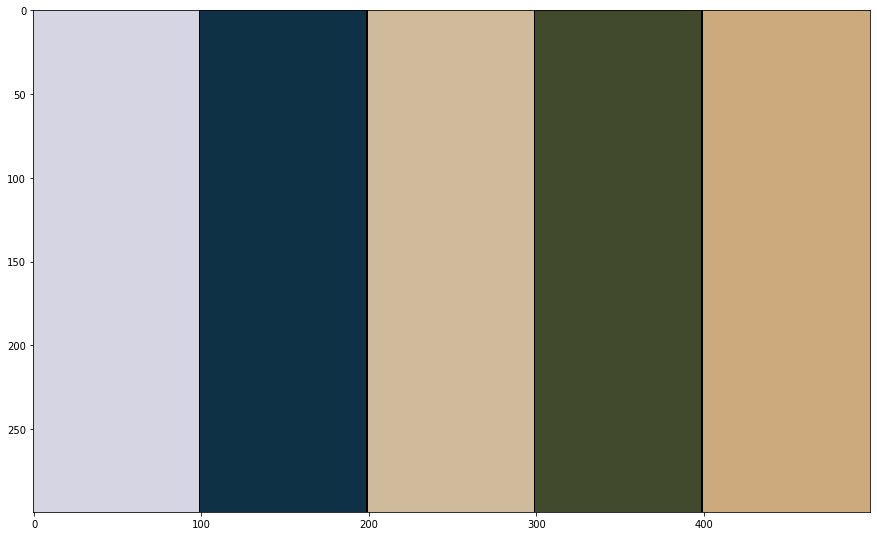

In [20]:
#create empty array
colorArray=np.zeros([300,500,3], dtype=int)
print(colorArray.shape)

#begin painting the array, remember 0 indexing
colorArray[0:300,0:99,:]=upLeftPixel.astype(int)
colorArray[0:300,100:199,:]=atlanticPixel.astype(int)
colorArray[0:300,200:299,:]=usPixel.astype(int)
colorArray[0:300,300:399,:]=russiaPixel.astype(int)
colorArray[0:300,400:500,:]=northAfricaPixel.astype(int)

%matplotlib inline
imshow(colorArray)
fig = plt.gcf()
fig.set_size_inches(15, 30)

##  The color of data

You should get approximately the following colors:

 - upper leftmost pixel                  : Ice white

 - Atlantic pixel                        : Blue

 - middle of the United States pixel     : Light brown

 - western Russia pixel                  : Green

 - north Africa pixel                    : Yellow-orange

Given that our JPEG above is of a geographic satellite map of the world, these colors correspond to the color (refleted visible light) of the surface of the earth in that area (As viewed from space, roughly speaking).  As such we can infer the types of environments associated with each of these locations using the color information.

#### What types of environments are found at each of these pixels?
(feel free to leverage the information provided with the label/description of the pixel's source)

We'll plot the subjection of the satellite image surrounding the pixel below, in order to provide you with a zoomed in look at the are the pixel reprsents. 

(99, 499, 3)


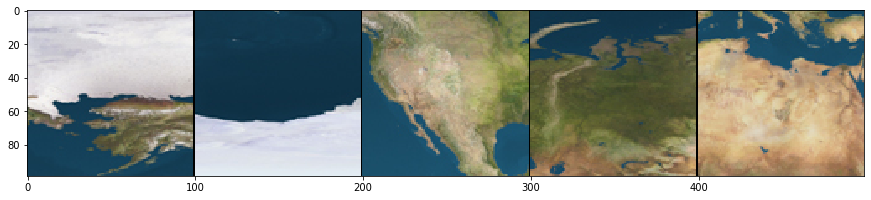

In [21]:
#create empty array
sectionArray=np.zeros([99,499,3], dtype=int)
print(sectionArray.shape)

#remember the sources
#upLeftPixel=firstMapArray[0,0]
#atlanticPixel=firstMapArray[450,400]
#usPixel=firstMapArray[150,250]
#russiaPixel=firstMapArray[80,700]
#northAfricaPixel=firstMapArray[180,550]

#begin painting the array, remember 0 indexing, extracting 100x100 squares from origional image
sectionArray[0:99,0:99,:]=firstMapArray[0:99,0:99,:]
sectionArray[0:99,100:199,:]=firstMapArray[400:499,350:449,:]
sectionArray[0:99,200:299,:]=firstMapArray[100:199,150:249,:]
sectionArray[0:99,300:399,:]=firstMapArray[30:129,650:749,:]
sectionArray[0:99,400:499,:]=firstMapArray[130:229,500:599,:]

%matplotlib inline
imshow(sectionArray)
fig = plt.gcf()
fig.set_size_inches(15, 30)

##  A biome's color
*find a way to hide this until run*

 - upper leftmost pixel            : White     ->  Ice

 - Atlantic                        : Blue      ->  Ocean

 - middle of the United States     : Yellow    ->  Plains

 - western Russia                  : Green     ->  Forests

 - north Africa                    : Orange    ->  Desert

As we can see, its pretty straightforward to infer the envornment type from the color of the pixel.  Keep in mind that, although we are abstracting from the visible color (a visible property resulting from the RGB value information represented) to a color name (a categorical label), we've essentially applied this environmental label in virtue of a quantative property, specifically the RGB value.  This is a *very* interesting capability, particularly when we describe it a bit more generally:

We can **systematically** apply a **categorical label** using **quantative information**

#### How might we use this here with the sattilite data?
Consider for a moment the sorts of things we could now do with the data from our satellite image.

*find a way to hide this until run*

One thing you might wonder is:

#### Can we select all of the pixels that correspond to a specific biome?

Well, yes.  Although some environment types exhibit variability in their coloring (exhibit a range of RGB color values), others are fairly homogenous, and therefore easier to find systematically.  

#### Which environment is the most homogenous?
Which environment type would be covered by the narrowest range of color values?

#### How would create a rule, or series of rules (i.e. algorithm) find all of the image pixels correspond to this environment type?
How would you, based on the numerical RGB values, decide whether or not a specific pixel is of the specified environment type?

*find a way to hide this until run*
####  A potential method?

The ocean appears to be the most homogenous of the various environment types.

####  Can we find all pixels of that type?

Well, the first task is to set the color that we will treat as *the* quintessential ocean color.  In essence this should be the "average" ocean color.  For our purposes we can just stick with the color we selected for the Atlantic pixel.  However, we should keep in mind that this will also pick up fresh water bodies as well, as their color properties aren't vastly different from the oceans.

Lets go ahead and set that color as a variable now and then count how many pixels that color value corresponds to.  

We'll print out the number of possible pixels below, the total number of pixels that are *exactly* that color, and the proportion of the total number of pixles that correspond to this exact matching.

#### How many pixels do you expect this to be?
We know that the ocean covers approximately 71 percent of the earth's surface.  How many pixels from the image do we expect this to correspond to?


In [22]:
print('Atlantic pixel RGB')
#equitorial blue
#atlanticColor=firstMapArray[150,400]

#nonequator blue
#atlanticColor=firstMapArray[400,200]

#artic blue
atlanticColor=firstMapArray[450,400]
print(atlanticColor)
print('')

#subtract atlantic blue from the pixel data.  0 values indicate equivalence
zeroBlueMask=np.subtract(firstMapArray,atlanticColor)
#sum the total color difference, we use absolute to avoid strange edge cases where the distance from blue sums to 0
blueDiffSum=np.sum(np.absolute(zeroBlueMask),axis=2)

#[Atlantic blue - Atlantic blue] = 0 , so we should just find the zeros
exactColorMask=[blueDiffSum==0]

#counts the number of nonzero (not false) values in mask array
totalExact=np.count_nonzero(exactColorMask)

#extract the image dimensions from the image dimenion variable obtained earlier
imgDimY=np.asarray(firstMapShape[0])
imgDimX=np.asarray(firstMapShape[1])

print('Total number of pixels in satellite .jpeg image:')
print([imgDimY*imgDimX])

print('Number of pixels EXACTLY equal to atlantic pixel color value:')
print(totalExact)

print('Proportion of total pixels:')
print(np.divide(totalExact,[imgDimY*imgDimX]))



Atlantic pixel RGB
[14 49 69]

Total number of pixels in satellite .jpeg image:
[500000]
Number of pixels EXACTLY equal to atlantic pixel color value:
1031
Proportion of total pixels:
[0.002062]


### An unexpected result?

First thing to note: This is a fairly small number of pixels.  If the earth's surface is 71% water, why didn't we get anything remotely close to that with our previous result?

#### A possible explanation?

There are a lot of different combinations of colors that could repersent water.  Indeed, there's varibility visible in the initial sattilite image--it's not just one color.  If a pixel is off by even one value, it wouldn't have been counted above.  As it stands we only got about .2 % of the surface pixels.

#### So how do we find the remaining 70.8% of pixels?

Our method for finding pixels that were the same as "Atlantic blue" provides a big hint.  

#### How did we count the number of "Atlantic blue" pixels?

### Checking our math

Our total count was reported by printing the contents of the **totalExact** variable.  This variable, in turn was computed by counting the number of non-zero entries in the **exactColorMask** variable.  What was in the **exactColorMask** variable? 

**exactColorMask** was generated by subtracting the "Atlantic blue" RGB value [14 49 69] from each pixel in the original image and then (after summing the absolute value of this result) looking for pixels which had **no** difference (i.e. were 0).  

Thus in pixels that were *exactly* "Atlantic blue" we (roughly) had  the following situation:  

[Atlantic blue]-[Atlantic blue] == [14 49 69] - [14 49 69] = [0 0 0]

and

sum([0,0,0])=0

There is no difference in any of the RGB channels in this case.  As such, we were able to sum across the third dimension (the RGB dimension) and thereby find the pixels without any difference.  Keep in mind that although the colors represented by [14 49 70] and [14 50 69] may not be distinguishable by our eyes, this method would return a nonzero value in the second case, which would be enough to signal a difference.  In such a case we would not include that pixel in our count of "Atlantic blue" pixels.

#### How can we include pixel colors that are "nearby" Atlantic blue [14 49 69] in our count?
Is there a way we could include pixel colors like [14 49 70] or [14 48 69] in our count of water pixels?

##  Using trigonometry to compute color distances


When we ran the "Atlantic blue" algorithm described above, we essentially treated the output as binarized when we asked whether or not there was difference between "Atlantic blue" and the pixel in question was *exactly* zero.  In essence:

"Is this Atlantic blue" --> if "Atlantic blue"-currentPixel==0, **yes**, otherwise **no** 

However, the most direct output of our method (the initial subtraction result) *is not* actualy binarzed.  That is, we don't actually get only "yes" or "no" answers"

#### What do we actually get from "zeroBlueMask=np.subtract(firstMapArray,atlanticColor)"

Instead, for each pixel, it's a 1x3 vector that corresponds to the numerical difference between "Atlantic blue" and that pixel. In 1031 cases this is [0 0 0], but for [14 49 70] it would be [0 0 1] and for [14 48 69] it would be [0 -1 0]

We can think about those colors as being "1" away from "Atlantic blue"

#### Can we generalize this concept?

If we think about this a bit more geometrically, we could treat the RGB values as the axes of an XYZ plot.  In such a fashion each color could be placed in this arrangment in accordance with their X (red), Y (green), and Z (blue) coordinates.  Colors could then have their "distance" computed by seeing how far away they are from one another in this spatial arrangement.

Thus we would use the *hypotenuse* of the 3 dimensional right triangle formed by the spatial difference between these two points.

This is a method we can systematically use to compute pixels' color distance from "Atlantic blue"!

Lets impliment some code that does exactly this.  We'll then plot a histogram of these differences to get a sense of the distribution of color distances from "Atlantic blue" in the image, and we'll also look at these distances mapped on to the original satellite image.

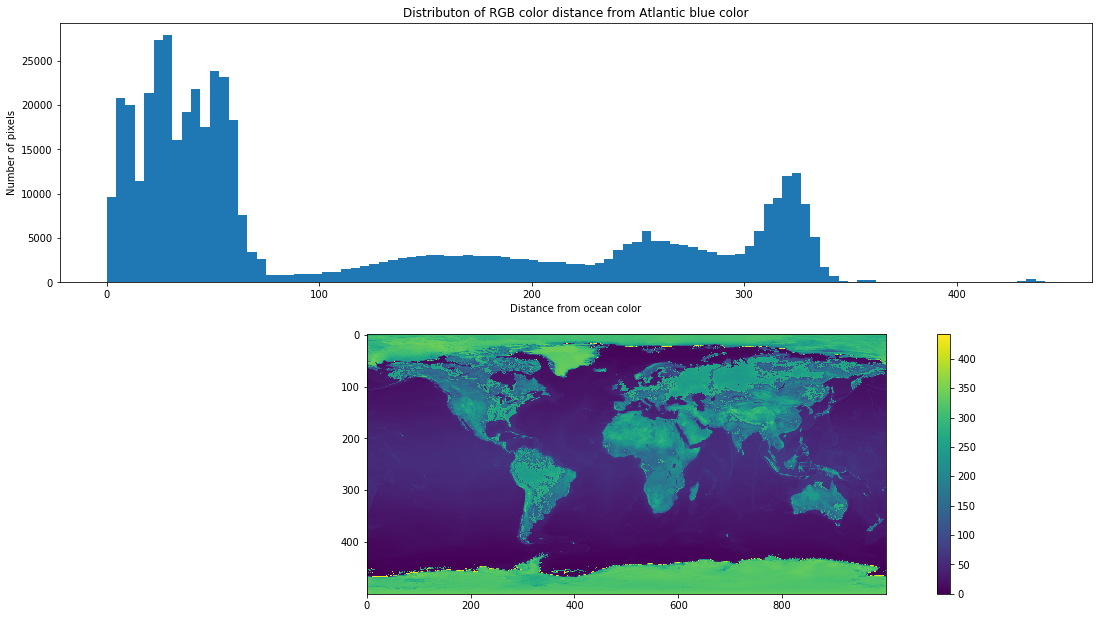

In [31]:
import numpy as np
import matplotlib.pyplot as plt

#quick and dirty general use hypoteuse algorithm, can be used for 2d or 3D
def multiDHypot(coords1,coords2):
    dimDisplace=np.subtract(coords1,coords2)
    elementNum=dimDisplace.size
    elementSquare=np.square(dimDisplace)
    elementSquareSum=np.sum(elementSquare)
    if elementNum==1:
        hypotLeng=dimDisplace
    elif elementNum==2:
        hypotLeng=np.sqrt(elementSquareSum)
    elif elementNum==3:
        hypotLeng=np.sqrt(elementSquareSum)
    return hypotLeng


colorDistMeasures=np.zeros(([firstMapShape[0],firstMapShape[1]]))

for iRows in range(firstMapShape[0]):
    for iColumns in range(firstMapShape[1]):
        #for all colors
        curPixelVal=zeroBlueMask[iRows,iColumns]
        
        #or maybe just a single color
        #curPixelVal=zeroBlueMask[iRows,iColumns,0]
        
        #could be done with raw input
        colorDistMeasures[iRows,iColumns]=multiDHypot(curPixelVal,atlanticColor)
        
        #or done with the distance array we already made
        colorDistMeasures[iRows,iColumns]=multiDHypot(curPixelVal,[0,0,0])

flattenedDistances=np.ndarray.flatten(colorDistMeasures)

ax1=plt.subplot(2, 1, 1)
plt.hist(flattenedDistances, bins=100)
plt.xlabel('Distance from ocean color')
plt.ylabel('Number of pixels')
plt.title('Distributon of RGB color distance from Atlantic blue color')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


ax2=plt.subplot(2, 1, 2)
heatPlot=plt.imshow(colorDistMeasures)
fig2=plt.gcf()
fig2.colorbar(heatPlot)

##  Visualizing color distances

Above are two plots that are generated by the preceeding code.  The first of these plots the distribution of color distances found in the satellite image.  Thus, in total, the various bars of this graph should represent distance calculations from 500 x 1000 = 500,000 pixels.  From the plot we can also see that there appear to be three or four "clusters":

-   0    to  ~75
-  ~100  to  ~230
-  ~230  to  ~290
-  ~300  to  ~340

These likely correspond to colors/environment-types that cover large portions of the Earth.  

#### The big cluster, from 0 to 75 is the one we are intested in, and to see why we can look at the plot below the histogram.

In the plot below the histogram we see a differently colored view of the satellite image.  Here, instead of visible light, we are plotting the numerical color distance from "Atlantic blue".  Referencing the colorbar to the right, we see that most of the ocean is less than 100 "distance units" from the "Atlantic blue" color.  What if we selected only those pixels that were *less than* some specified distance from the color of interest ("Atlantic blue")?

#### What's the ideal distance from "Atlantic blue" to capture as many water pixels as possible and as few land pixels as possible?

Below we'll select a threshold value for selecting the pixels of interest.  Use the slider bar to move the threshold along the histogram.  Pixels that are *less than* the specified color distance from "Atlantic blue" will be displayed in yellow, while those that are *greater than* the specified color distance will be displayed in blue-purple.  Your goal is to select the ideal threshold value that best (and most selectively) finds water pixels.  There are multiple ways to manipulate the slider:  You can use your mouse directly, you can use the arrow keys of your keyboard, or you can enter a number directtly.

**NOTE:  the mask you make here (using the specified threshold) will be used in subsequent sections.  If the mask is not set well here, you won't get good results later**

**ALSO IMPORTANT:  once the mask is to your liking DO NOT run the cell again (as this will reset the threshold to 0)**

In [43]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider
from ipywidgets import FloatSlider

def updatePlots(DistanceArray,cutVal):

    flattenedDistances=np.ndarray.flatten(DistanceArray)

    plt.subplot(3, 1, 1)
    plt.hist(flattenedDistances, bins=100)
    plt.xlabel('Distance from ocean color')
    plt.ylabel('Number of pixels')
    plt.title('Distributon of RGB color distance from Atlantic pixel color')
    xposition = [cutVal]
    for xc in xposition:
        plt.axvline(x=xc, color='r', linestyle='--', linewidth=3)
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
     
    naieveOceanMask=DistanceArray<cutVal
    
    plt.subplot(3, 1, 2)
    imshow(naieveOceanMask)
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    maskLabels = 'Presumed water', 'Presumed land'
    maskSizes = [np.sum(naieveOceanMask==1),np.sum(naieveOceanMask==0)]


def updateCut(cutVal):
    updatePlots(colorDistMeasures,cutVal)
 
cutVal=FloatSlider(min=np.min(flattenedDistances), max=np.max(flattenedDistances), step=1,continuous_update=False)
interact(updateCut, cutVal=cutVal) 

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='cutVal', max=441.6729559300…

<function __main__.updateCut(cutVal)>

**NOTE: Make sure your mask is good before continuing to subsequent sections**

## Making an ocean mask

Use the slider bar to try and select a color distance value which isolates just the water pixels.  The histogram plot is the same as the one from the previous cell, however the red bar indicates where in the distribution your current threshold is.  The second plot is the "mask" that you've created, in which yellow pixels indicate all of those pixels whose color distance is **less** than the threshold value you've set and the purple-blue pixles indicate all of those pixels whose color distance is **greater** than the threshold value you've set.  In this way, the yellow pixels represent those pixels that you deem suffecently close to "Atlantic blue", while the blue ones are deemed too far from "Atlantic blue" to plausably be considered water pixels.

#### What is the ideal threshold value?

Additionally, as you move the threshold around, you can observe which portions of the map go from blue to yellow, and thereby get a sense of what the clusters might represent.

#### What might the histogram clusters correspond to?

#### Some good guesses as to what the clusters correspond to:

-    0    to  ~75    = water
-   ~100  to  ~230   = grasslands, lighter forests
-   ~230  to  ~290   = mountians, darker forests, & deserts
-   ~300  to  ~340   = ice

#### A good guess as to the best threshold value

A value between 63 and 80 seems to do well, see which one you feel works best.

Now, for the sake of comparison, lets take a look at a map that was generated specifically for this purpose (demarcating land and water).  We'll also print out some information about the image, like its dimensions and color properties.

PNG (4378, 2435) RGBA

Ratio of width to height
1.797946611909651



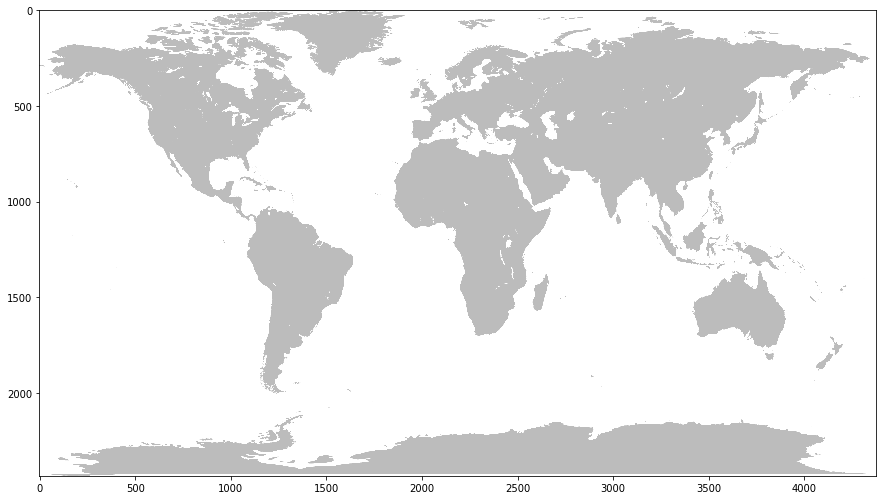

In [33]:
grayscaleMapPath=os.path.join(repoPath,'images',grayscaleMapName) 
grayscaleMap= Image.open(grayscaleMapPath)
print(grayscaleMap.format,grayscaleMap.size , grayscaleMap.mode)
print('')

#quick computation to obtain native aspect ratio approximation relative to preeceding image's 2:1
grayscaleMapApsectRatio=4378/2435
print('Ratio of width to height')
print(grayscaleMapApsectRatio)
print('')

#in order to display in jupyter, some trickery is necessary
%matplotlib inline
imshow(np.asarray(grayscaleMap))
fig = plt.gcf()
fig.set_size_inches(15, grayscaleMapApsectRatio*15)

From the above output plot we can note that its simply a binary grayscale output, with white indicating water and grey indicating land.  Although the data is stored in a RGBA format (and thus leverages data across **4** different color channels) really this same output could be accomplished using a single, 2d array.  In fact, in order to compare this to the result we generated, we'll need to convert it into a binary mask (a data array that contains only 1s and 0s, indicating true and false values respectively).  As such the 4 channels ultimately don't matter that much in this image.

However, it also seems that the dimensions of this image are different.  Although this is still a map depicting the world, we can now notice that are axes are about 4 times larger than the previous image.  This means that each pixel of this map is representing about 1/16th as much  surface area as the previous image.  If are going to overlay the images on one another to compare them, we ill have to to resize the figure so that it is of the same dimensions as our generated mask.

Lets do that now.

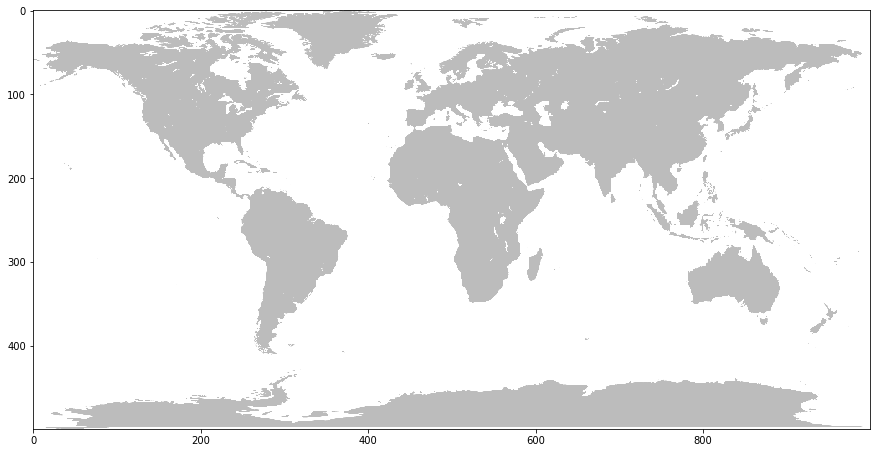

In [34]:
grayscaleResized=grayscaleMap.resize([firstMapShape[1],firstMapShape[0]], resample=0)
%matplotlib inline
grayscaleResizedData=np.asarray(grayscaleResized)
imshow(np.asarray(grayscaleResizedData))
fig = plt.gcf()
fig.set_size_inches(15, 30)



Note that the axes are now the same as the previous satellite image. Now that we have it resized, lets convert it to a 2D mask like we did previously.  This time though, we don't need to apply a specific threshold because there are only really two values in the image: gray and white. 

Lets plot this output in the same fashion we did the mask we obatined from the satellite.

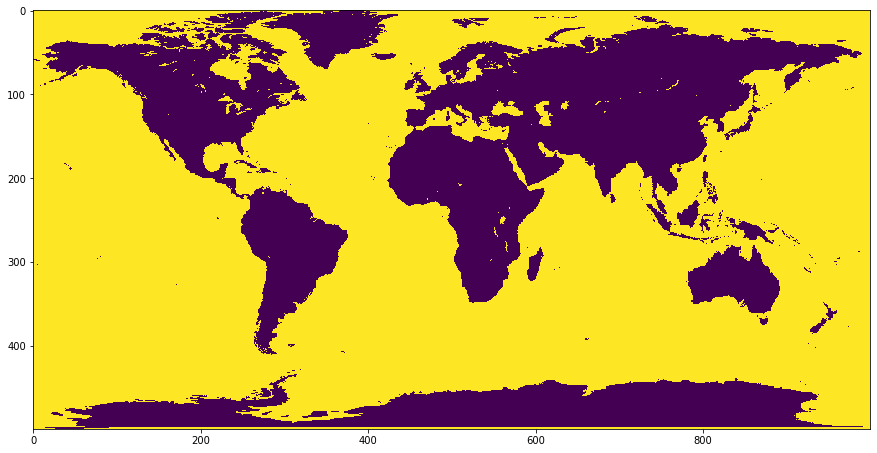

In [35]:
flatBinarized=np.sum(np.asarray(grayscaleResizedData),axis=2)

imshow(np.logical_not(flatBinarized))
fig = plt.gcf()
fig.set_size_inches(15, 30)

### Plotting the masks overlain

Now lets plot our two masks (user generated version and provided version) together in the plot.  Here we'll change the colors that we are using.  Red (i.e. "problem") pixels will indicate that there is a disagreement between the two masks.  This will occur when one says that the pixel is water while the other says that it is land.  Green pixels (i.e. "OK") will indicate pixels in which the two masks agree with one another, in that they both either indicate "land" or "water" 

Lets take a look at that now

#### What sorts of trends or regularities do you notice in the disagreement between the two maps?

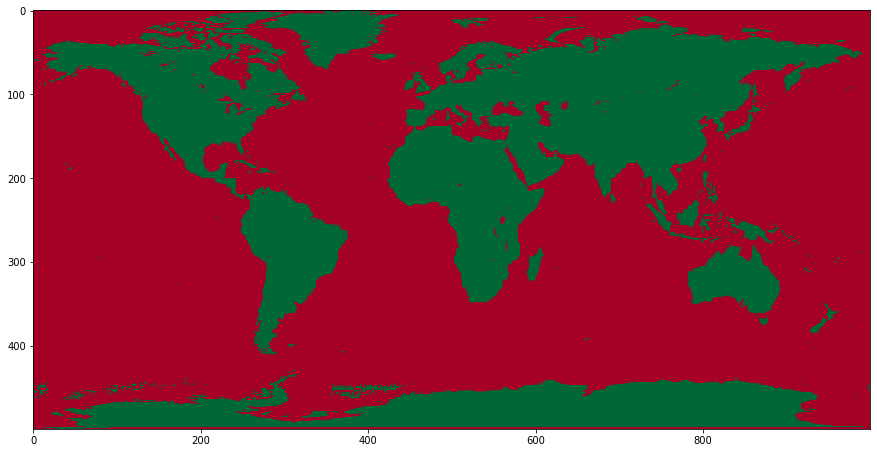

In [36]:
naieveOceanMask=colorDistMeasures>cutVal.value
obtainedOceanMask=flatBinarized==0
discrepancyMapping=(np.logical_xor(obtainedOceanMask,naieveOceanMask))

imshow(discrepancyMapping, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(15, 30)

#### What's with this pattern we are observing above?  Hou explain this apparent "shadowing" issue?

It appears that the two images are not aligned properly.  Although their sizes are the same, this does not appear to be sufficeint to guarentee that they are showing the same exact areas in the same exact pixels.  Given that this is a sphere we could imagine that this is because the "unfolded" map is roated to the left or right a bit, or may be shifted up or down.  One way to think about this is that the 0,0 point of the two maps, corresponding to the equator and the prime maridian, are not aligned.  Lets toggle with this and see if we can adjust them into alignment by moving one of the two images. 

Your goal will be to maximize the amount of yellow (agreement) being shown in the image below.  You should attempt to maximize the amount of the pie chart indicating agree, and minimize the amount of the pie chart indicating disagree. What are the x and y shifts necessary to acheive this?  The xOffset slider will move the the mask that you generated earlier left or right (on top of the land mask that was provided), the yOffset will move your mask up or down. 

Remember:  There are multiple ways to manipulate the slider.  You can use your mouse directly, you can use the arrow keys of your keyboard, or you can enter a number directtly

In [37]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider

def plot_mapDiscrepancy(map1,map2): 
    discrepancyMapping=np.logical_xor(map1,map2)
    %matplotlib inline
    imshow(discrepancyMapping)
    fig = plt.gcf()
    fig.set_size_inches(15, 30)
    
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'Agree', 'Disagree'
    sizes = [np.sum(discrepancyMapping==1),np.sum(discrepancyMapping==0)]

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,  labels=labels, autopct='%1.3f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
def update(xOffset, yOffset):
    naieveOceanMaskMoved = np.roll(naieveOceanMask,yOffset,0)
    naieveOceanMaskMoved = np.roll(naieveOceanMaskMoved,xOffset,1)
    plot_mapDiscrepancy(obtainedOceanMask,naieveOceanMaskMoved)

interact(update, xOffset=IntSlider(min=-30, max=30, step=1,continuous_update=False),  yOffset=IntSlider(min=-30, max=30, step=1,continuous_update=False))


interactive(children=(IntSlider(value=0, continuous_update=False, description='xOffset', max=30, min=-30), Int…

<function __main__.update(xOffset, yOffset)>

It seems that the lowest mismatch percentage you can get is around 17%, which occurs at -28 x offset and -9 y offset.  What accounts for the remaining mismatch?  Part of it likely has to do with how our mask was made, and that it likely wasnn't entirely perfect.

One major source is the fact that sea ice is not the color of water, but is not included in the purpose made land mask we obtained either.  Hence our algorithm considers it "land" (because it is not water), even though the gray colored mask is specific to land (which ice does not count as).

Finally, one final source is likely that the two maps, even if they have their equator and prime maridian lined up, may not be warped (reshaped from a surface that covers a sphere) in exactly the same way.  Theoretically we could attempt to apply a nonlinear warp to try and align the two images, but this would be beyond the scope of this introduction to digital image representations and masks.

#### How this relates to neuroimaging


In the next lesson we will see a more complex version of a mask, one which is not binary, but instead features multiple different objects.